<a href="https://colab.research.google.com/github/AURORARISE/MSSP-6070/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [27]:
csv_path = "/content/drive/MyDrive/MSSP6070/a. Assignments/Assignment3/HousingPrices.csv"
df = pd.read_csv(csv_path)
print("Columns in dataset:\n", df.columns, "\n")

Columns in dataset:
 Index(['Id', 'LotFrontage', 'LotArea', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'FullBath', 'TotalRooms', 'GarageCars', 'GarageArea',
       'YrSold', 'SalePrice'],
      dtype='object') 



In [28]:
prices = df["SalePrice"].dropna()

In [29]:
mean_price = prices.mean()
std_price = prices.std()
min_price = prices.min()
max_price = prices.max()
median_price = prices.median()
print("=== Q1: Basic Summary of SalePrice ===")
print(f"Mean price:   {mean_price:,.2f}")
print(f"Std. dev:     {std_price:,.2f}")
print(f"Median price: {median_price:,.2f}")
print(f"Min price:    {min_price:,.2f}")
print(f"Max price:    {max_price:,.2f}\n")

=== Q1: Basic Summary of SalePrice ===
Mean price:   180,921.20
Std. dev:     79,442.50
Median price: 163,000.00
Min price:    34,900.00
Max price:    755,000.00



In [30]:
summary_table = pd.DataFrame({
    "Statistic": ["Mean", "Std Dev", "Median", "Min", "Max"],
    "SalePrice": [mean_price, std_price, median_price, min_price, max_price]
})
print("=== Summary Table for SalePrice (Appendix Table A1) ===")
display(summary_table)

=== Summary Table for SalePrice (Appendix Table A1) ===


,Statistic,SalePrice
0,Mean,180921.195890
1,Std Dev,79442.502883
2,Median,163000.000000
3,Min,34900.000000
4,Max,755000.000000


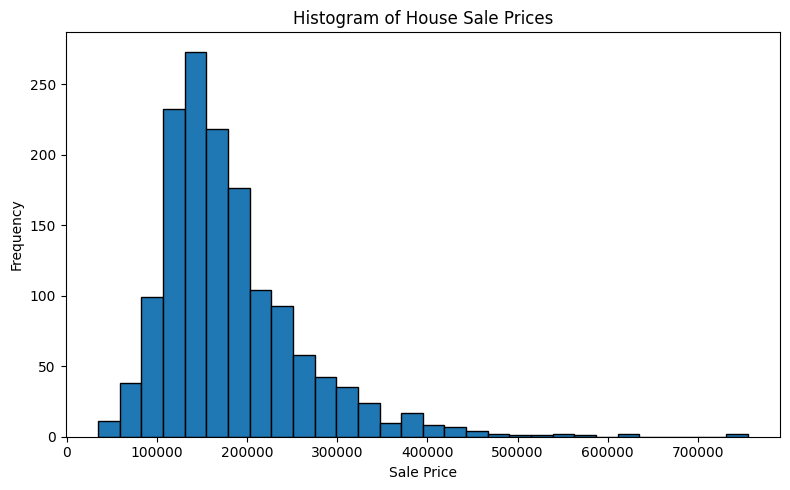

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(prices, bins=30, edgecolor="black")
plt.title("Histogram of House Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.tight_layout()

In [32]:
plt.show()

In [34]:
print("\n=== Q3: Outlier Detection ===")
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

outliers_iqr_mask = (prices < lower_bound_iqr) | (prices > upper_bound_iqr)
outliers_iqr = prices[outliers_iqr_mask]
non_outliers_iqr = prices[~outliers_iqr_mask]

print(f"IQR method:")
print(f"  Q1 = {Q1:,.2f}, Q3 = {Q3:,.2f}, IQR = {IQR:,.2f}")
print(f"  Lower bound = {lower_bound_iqr:,.2f}")
print(f"  Upper bound = {upper_bound_iqr:,.2f}")
print(f"  # of outliers (IQR method) = {outliers_iqr.shape[0]}")
print(f"  # of non-outliers (IQR method) = {non_outliers_iqr.shape[0]}\n")


=== Q3: Outlier Detection ===
IQR method:
  Q1 = 129,975.00, Q3 = 214,000.00, IQR = 84,025.00
  Lower bound = 3,937.50
  Upper bound = 340,037.50
  # of outliers (IQR method) = 61
  # of non-outliers (IQR method) = 1399



In [35]:
upper_bound_3std = mean_price + 3 * std_price
lower_bound_3std = mean_price - 3 * std_price

outliers_3std_mask = (prices < lower_bound_3std) | (prices > upper_bound_3std)
outliers_3std = prices[outliers_3std_mask]

print("3 * Std Dev method:")
print(f"  Mean = {mean_price:,.2f}, Std Dev = {std_price:,.2f}")
print(f"  Lower bound = {lower_bound_3std:,.2f}")
print(f"  Upper bound = {upper_bound_3std:,.2f}")
print(f"  # of outliers (3*std method) = {outliers_3std.shape[0]}\n")

3 * Std Dev method:
  Mean = 180,921.20, Std Dev = 79,442.50
  Lower bound = -57,406.31
  Upper bound = 419,248.70
  # of outliers (3*std method) = 22



In [36]:
comparison_table = pd.DataFrame({
    "Group": ["Non-outliers (IQR)", "Outliers (IQR)"],
    "Count": [non_outliers_iqr.shape[0], outliers_iqr.shape[0]],
    "MeanPrice": [non_outliers_iqr.mean(), outliers_iqr.mean()],
    "MedianPrice": [non_outliers_iqr.median(), outliers_iqr.median()],
    "MinPrice": [non_outliers_iqr.min(), outliers_iqr.min()],
    "MaxPrice": [non_outliers_iqr.max(), outliers_iqr.max()]
})
print("=== Comparison Table: Non-outliers vs Outliers (IQR method) ===")
display(comparison_table)

=== Comparison Table: Non-outliers vs Outliers (IQR method) ===


,Group,Count,MeanPrice,MedianPrice,MinPrice,MaxPrice
0,Non-outliers (IQR),1399,170237.127234,159500.0,34900,340000
1,Outliers (IQR),61,425954.180328,394617.0,341000,755000


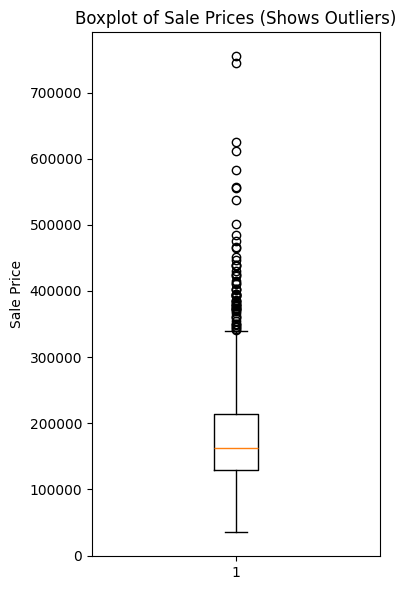

In [37]:
plt.figure(figsize=(4, 6))
plt.boxplot(prices, vert=True)
plt.title("Boxplot of Sale Prices (Shows Outliers)")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

In [38]:
if "HouseStyle" in df.columns:
    print("\n=== Appendix Table A2: Summary of SalePrice by HouseStyle ===")
    style_summary = (
        df.groupby("HouseStyle")["SalePrice"]
          .agg(Count="count", Mean="mean", Median="median", Min="min", Max="max")
          .sort_values("Mean")
    )
    display(style_summary)
else:
    print("\nNo 'HouseStyle' column found. Skipping style summary.")


=== Appendix Table A2: Summary of SalePrice by HouseStyle ===


,Count,Mean,Median,Min,Max
HouseStyle,,,,,
1.5Unf,14,110150.000000,111250.0,76000,139400
SFoyer,37,135074.486486,135960.0,75500,206300
1.5Fin,154,143116.740260,132000.0,37900,410000
2.5Unf,11,157354.545455,133900.0,101000,325000
SLvl,65,166703.384615,164500.0,91000,345000
1Story,726,175985.477961,154750.0,34900,611657
2Story,445,210051.764045,190000.0,40000,755000
2.5Fin,8,220000.000000,194000.0,104000,475000
